In [112]:
import numpy as np
import matplotlib.pyplot as plt
import MoireLattice
import scipy.linalg as la


In [113]:
FFLrp=np.loadtxt('JYLdata/FFLplus_nem3_real_0_0.txt')
FFLip=np.loadtxt('JYLdata/FFLplus_nem3_imag_0_0.txt')
Omega_FFp_0=FFLrp+1j*FFLip
FFLrm=np.loadtxt('JYLdata/FFLminus_nem3_real_0_0.txt')
FFLim=np.loadtxt('JYLdata/FFLminus_nem3_imag_0_0.txt')
Omega_FFm_0=FFLrm+1j*FFLim

In [114]:
Omega_FFp=np.reshape(Omega_FFp_0, [36,36,7*7,2,2], order='F')
Omega_FFm=np.reshape(Omega_FFm_0, [36,36,7*7,2,2], order='F')

In [115]:
#Lattice parameters 
#lattices with different normalizations 
Nsamp=6
theta=1.05*np.pi/180  # magic angle 
latt=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0)
latt=latt

[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)
# print(latt.Npoints, "points in the lattice")
umkl=1
[KX1bz, KY1bz]=latt.Generate_lattice() #for the integration grid, we integrate over these
[KX,KY]=latt.Generate_Umklapp_lattice2(KX1bz, KY1bz,umkl) #for the q external momenta
[KQX,KQY]=latt.Generate_Umklapp_lattice2(KX1bz, KY1bz,umkl+1) #for the momentum transfer lattice
Npoi1bz=np.size(KX1bz)
Npoi=np.size(KX)
NpoiQ=np.size(KQX)

Ik=latt.insertion_index( KX1bz,KY1bz, KQX, KQY)
[q1,q2,q3]=latt.qvect()
qscale=la.norm(q1) #necessary for rescaling since we where working with a normalized lattice 
dS_in=1/Npoi1bz

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.002627134323120117  s


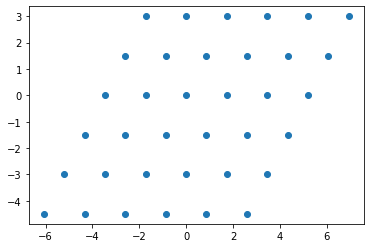

In [116]:
plt.scatter(GM1[0]*j1_matrix+GM2[0]*j2_matrix,GM1[1]*j1_matrix+GM2[1]*j2_matrix)

In [117]:

print("testing symmetry of the form factors...")
[KXc3z,KYc3z, Indc3z]=latt.C3zLatt(KX1bz,KY1bz)
diffarp=[]
diffarm=[]
K=[]
KP=[]
cos1=[]
cos2=[]
kp=np.argmin(KX1bz**2 +KY1bz**2)
for k in range(Npoi1bz-1):
    K.append(KX1bz[k]-KX1bz[kp])
    KP.append(KY1bz[k]-KY1bz[kp])
    #Regular FF
    # Plus Valley FF Omega
    undet=np.abs(np.linalg.det(Omega_FFp[k,kp,0,:,:]))
    cos1.append(undet)
    

testing symmetry of the form factors...


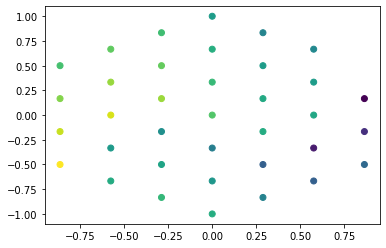

In [118]:
plt.scatter(K,KP,c=np.log(np.array(cos1)))

In [119]:
#Lattice parameters 
#lattices with different normalizations 
Nsamp=6
theta=1.05*np.pi/180  # magic angle 
latt=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0)
latt=latt

[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)
# print(latt.Npoints, "points in the lattice")
umkl=1
[KX1bz, KY1bz]=latt.Generate_lattice() #for the integration grid, we integrate over these
[KX,KY]=latt.Generate_Umklapp_lattice2(KX1bz, KY1bz,umkl) #for the q external momenta
[KQX,KQY]=latt.Generate_Umklapp_lattice2(KX1bz, KY1bz,umkl+1) #for the momentum transfer lattice
Npoi1bz=np.size(KX1bz)
Npoi=np.size(KX)
NpoiQ=np.size(KQX)

Ik=latt.insertion_index( KX1bz,KY1bz, KQX, KQY)
[q1,q2,q3]=latt.qvect()
qscale=la.norm(q1) #necessary for rescaling since we where working with a normalized lattice 
dS_in=1/Npoi1bz

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0024330615997314453  s


In [120]:
Nsamp=6
Mesh=[Nsamp,Nsamp]

theta=1.05*np.pi/180  # magic angle
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one
[GM1,GM2]=lq.GMvec

a0 = 1;
k_D = 4*np.pi/(3*np.sqrt(3)*a0);

q1 = k_D*2*np.sin(theta/2)*np.array([0,-1]);
q2 = k_D*2*np.sin(theta/2)*np.array([np.sqrt(3)/2,1/2]);
q3 = k_D*2*np.sin(theta/2)*np.array([-np.sqrt(3)/2,1/2]);

G1 = q2 - q3;
G2 = q2 - q1;

j1_list=np.arange(0,Mesh[0])-np.floor(Mesh[0]/2)
j2_list=np.arange(0,Mesh[1])-np.floor(Mesh[1]/2)

j1_matrix,j2_matrix=np.meshgrid(j1_list,j2_list)

Em=np.loadtxt('JYLdata/Em_0_0.txt')

[0.8660254 1.5      ] [0.07676252 0.        ]
[-1.73205081  0.        ] [0.03838126 0.06647829]
1.732050807568883
1.7320508075688774


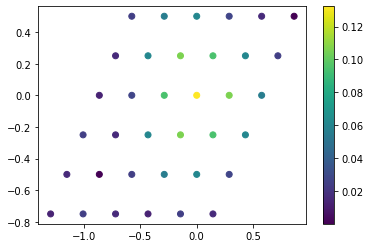

In [127]:
# np.shape(Em)
kx=-GM2[0]*j1_matrix/Mesh[0]+GM1[0]*j2_matrix/Mesh[1]
ky=-GM2[1]*j1_matrix/Mesh[0]+GM1[1]*j2_matrix/Mesh[1]

kx2=kx.flatten()
ky2=ky.flatten()
plt.scatter(kx2,ky2, c=Em[1])
plt.colorbar()

print(GM1,G1)
print(GM2,G2)
print(GM1[1]/GM1[0])
print(G2[1]/G2[0])


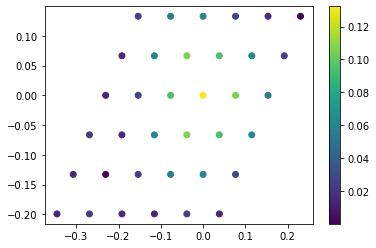

In [123]:
# np.shape(Em)
kx3=(G1[0]*j1_matrix+G2[0]*j2_matrix).flatten()
ky3=(G1[1]*j1_matrix+G2[1]*j2_matrix).flatten()
plt.scatter(,, c=Em[1])
plt.colorbar()

In [104]:
import Hamiltonian
hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
hvkd=hbvf*q
kappa=0.75
up = 0.105; # eV
u = kappa*up; # eV
alpha=up/hvkd
alph=alpha
PH=True

hpl=Hamiltonian.Ham_BM_p(hvkd, alph, 1, lq, kappa, PH)
hmin=Hamiltonian.Ham_BM_p(hvkd, alph, -1, lq, kappa, PH)
NP=np.shape(kx)
print(NP)


(6, 6)


In [128]:
Ene_valley_plus_a=np.empty((0))
Ene_valley_min_a=np.empty((0))
psi_plus_a=[]
psi_min_a=[]

nbands=2
NP=np.size(kx2)

print(f"starting dispersion with {NP} points..........")


for l in range(NP):
    E1,wave1=hpl.eigens(kx2[l],ky2[l],nbands)
    Ene_valley_plus_a=np.append(Ene_valley_plus_a,E1)
    psi_plus_a.append(wave1)
    E1,wave1=hmin.eigens(kx2[l],ky2[l],nbands)
    Ene_valley_min_a=np.append(Ene_valley_min_a,E1)
    psi_min_a.append(wave1)
    # printProgressBar(l + 1, Npoi_Q, prefix = 'Progress Diag2:', suffix = 'Complete', length = 50)

##relevant wavefunctions and energies for the + valley
psi_plus=np.array(psi_plus_a)
Ene_valley_plus= np.reshape(Ene_valley_plus_a,[NP,nbands])
psi_min=np.array(psi_min_a)
Ene_valley_min= np.reshape(Ene_valley_min_a,[NP,nbands])



starting dispersion with 36 points..........


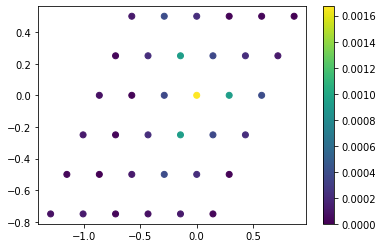

In [129]:
plt.scatter(kx2,ky2,c=Ene_valley_min[:,1])
plt.colorbar()